# Import Library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

# Read data

In [2]:
df = pd.read_csv('diamonds.csv')

df

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,b'Ideal',b'D',b'SI1',60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,b'Good',b'D',b'SI1',63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,b'Very Good',b'D',b'SI1',62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,b'Premium',b'H',b'SI2',61.0,58.0,2757.0,6.15,6.12,3.74


# Exploratory Data Analysis 

### info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


### dtypes

In [4]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
'x'        float64
'y'        float64
'z'        float64
dtype: object

### shape

In [5]:
df.shape

(53940, 10)

### describe()

In [6]:
df.describe()

,carat,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Describe All Variable

In [7]:
Carat = df['carat'].describe()

print('Carat')
print('======================')
print(Carat)

Carat
count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64


In [8]:
Cut = df['cut'].describe()

print('Cut')
print('======================')
print(Cut)

Cut
count        53940
unique           5
top       b'Ideal'
freq         21551
Name: cut, dtype: object


In [9]:
Color = df['color'].describe()

print('Color')
print('======================')
print(Color)

Color
count     53940
unique        7
top        b'G'
freq      11292
Name: color, dtype: object


In [10]:
clarity = df['clarity'].describe()

print('clarity')
print('======================')
print(clarity)

clarity
count      53940
unique         8
top       b'SI1'
freq       13065
Name: clarity, dtype: object


In [11]:
depth = df['depth'].describe()

print('depth')
print('======================')
print(depth)

depth
count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64


In [12]:
table = df['table'].describe()

print('table')
print('======================')
print(table)

table
count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64


In [13]:
price = df['price'].describe()

print('price')
print('======================')
print(price)

price
count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64


In [14]:
Vx = df["'x'"].describe()

print('x')
print('======================')
print(Vx)

x
count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: 'x', dtype: float64


In [15]:
Vy = df["'y'"].describe()

print('y')
print('======================')
print(Vy)

y
count    53940.000000
mean         5.734526
std          1.142135
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: 'y', dtype: float64


In [16]:
Vz = df["'z'"].describe()

print('z')
print('======================')
print(Vz)

z
count    53940.000000
mean         3.538734
std          0.705699
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: 'z', dtype: float64


## Visualizing each columns

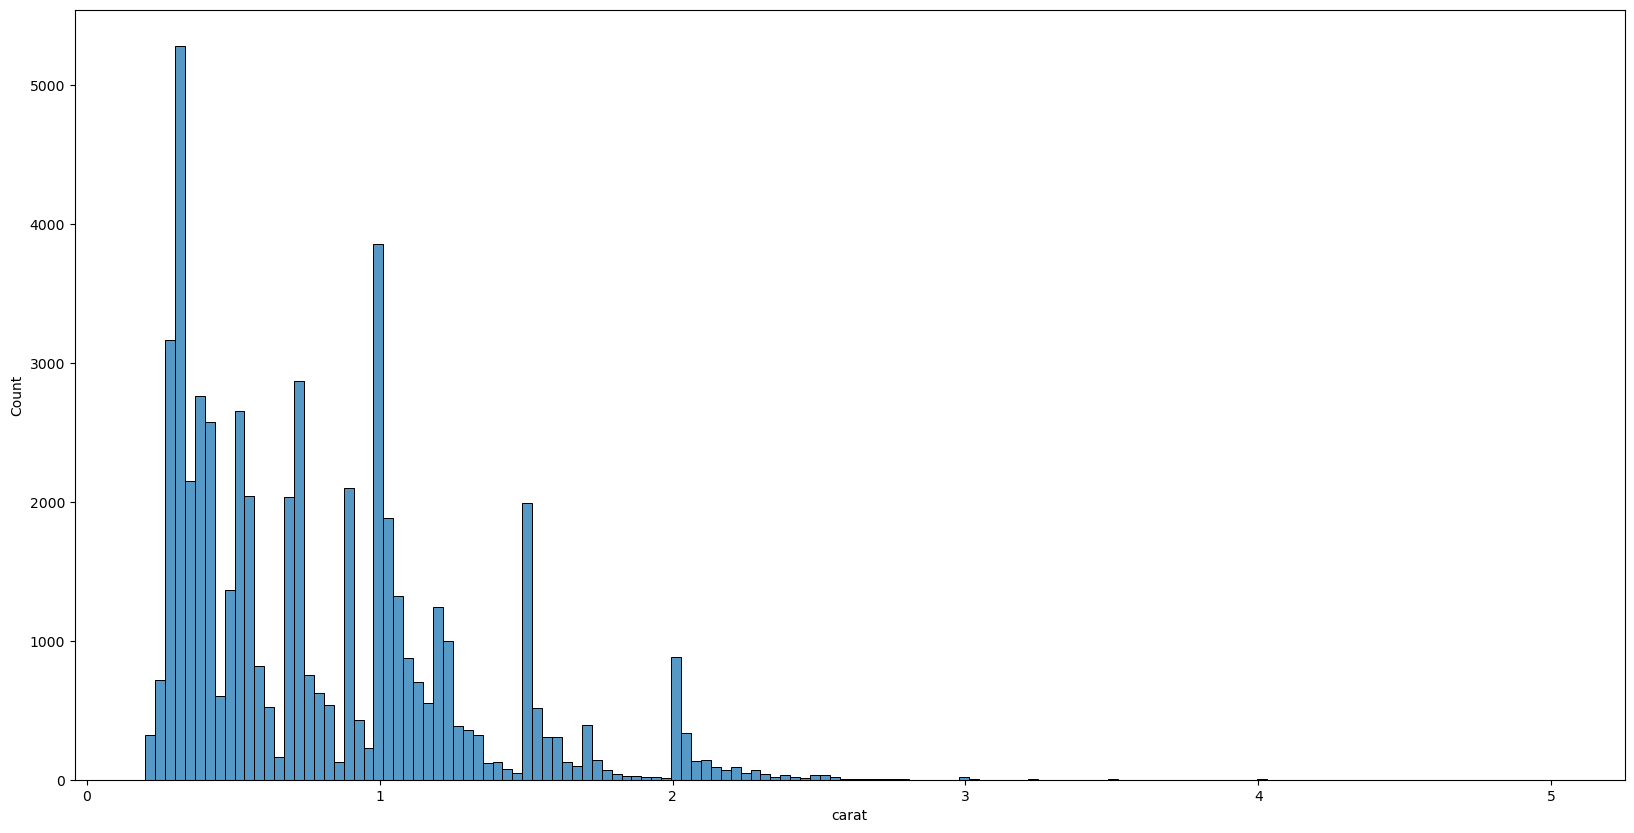

In [17]:
plt.subplots(figsize=(20,10))
sns.histplot(df["carat"])
plt.show()

{"b'Fair'": 1610, "b'Good'": 4906, "b'Ideal'": 21551, "b'Premium'": 13791, "b'Very Good'": 12082}


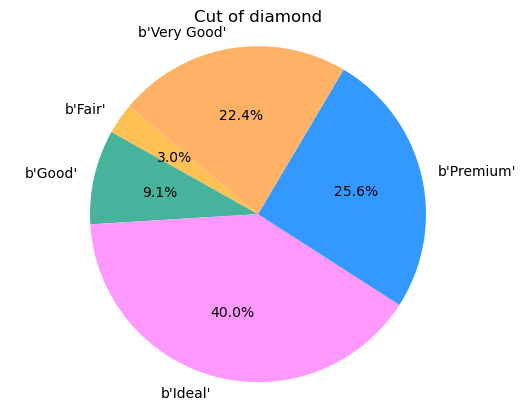

In [18]:
counts = df.groupby('cut').size().to_dict()

print(counts)
plt.pie(counts.values(), labels = counts.keys(), colors = ['#FFC154', '#47B39C', '#FF99FF', '#3399FF', '#FFB266'], autopct = '%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title('Cut of diamond')
plt.show()

{"b'D'": 6775, "b'E'": 9797, "b'F'": 9542, "b'G'": 11292, "b'H'": 8304, "b'I'": 5422, "b'J'": 2808}


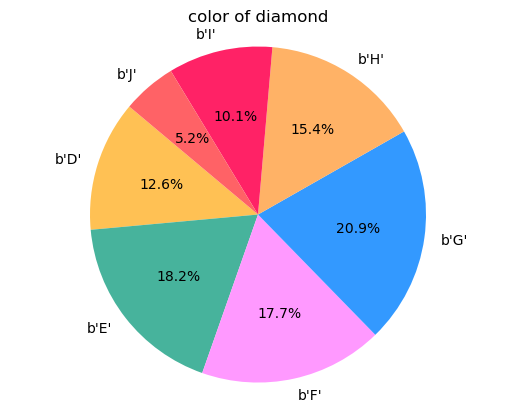

In [19]:
counts = df.groupby('color').size().to_dict()

print(counts)
plt.pie(counts.values(), labels = counts.keys(), colors = ['#FFC154', '#47B39C', '#FF99FF', '#3399FF', '#FFB266', '#FF2266', '#FF6266'], autopct = '%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title('color of diamond')
plt.show()

{"b'I1'": 741, "b'IF'": 1790, "b'SI1'": 13065, "b'SI2'": 9194, "b'VS1'": 8171, "b'VS2'": 12258, "b'VVS1'": 3655, "b'VVS2'": 5066}


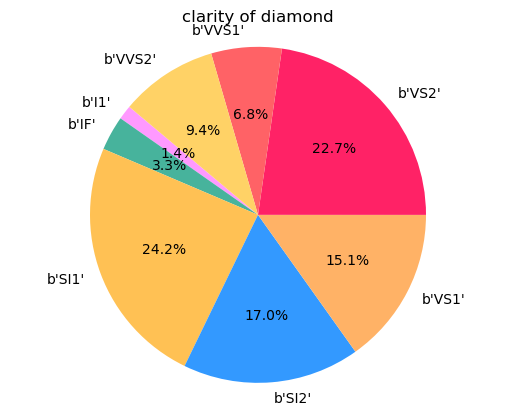

In [20]:
counts = df.groupby('clarity').size().to_dict()

print(counts)
plt.pie(counts.values(), labels = counts.keys(), colors = ['#FF99FF', '#47B39C', '#FFC154', '#3399FF', '#FFB266', '#FF2266', '#FF6266', '#FFD266'], autopct = '%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title('clarity of diamond')
plt.show()

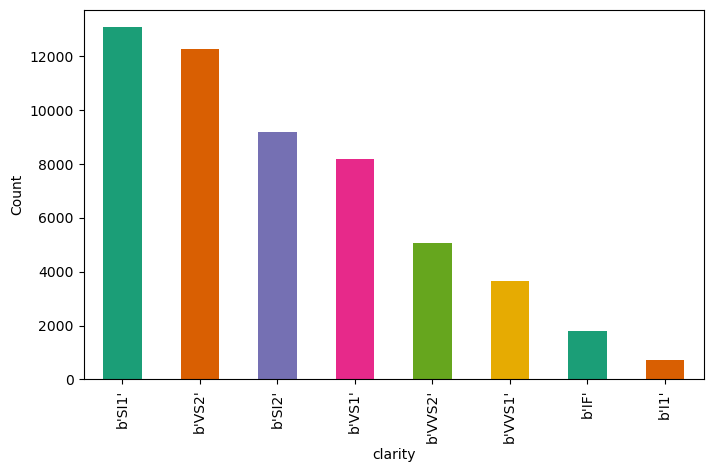

In [21]:
def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
    from matplotlib import pyplot as plt
    import seaborn as sns
    count_series = df[colname].value_counts()
    ax = count_series.plot(kind='bar', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8, 4.8))

    # Set the x-axis label to 'Clarity' and y-axis label to 'Count'
    ax.set_xlabel(colname)
    ax.set_ylabel('Count')

    return

chart = categorical_histogram(df, 'clarity', **{})
chart

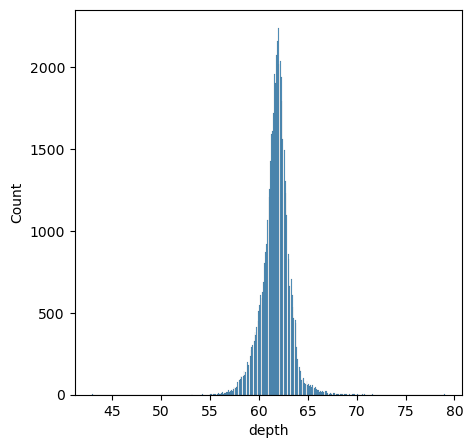

In [22]:
plt.subplots(figsize=(5,5))
sns.histplot(df["depth"])
plt.show()

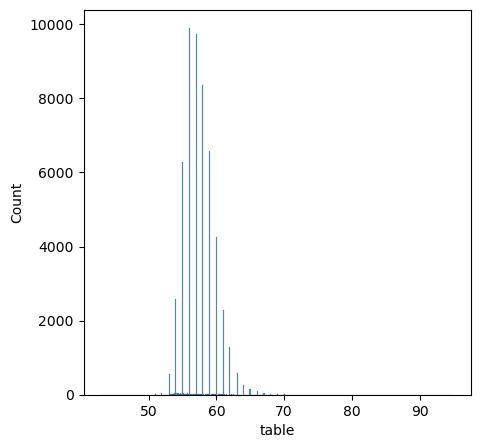

In [23]:
plt.subplots(figsize=(5,5))
sns.histplot(df["table"])
plt.show()

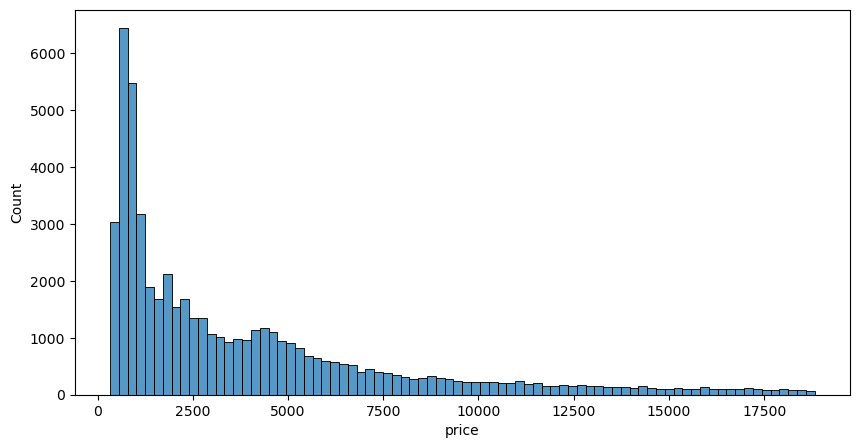

In [24]:
plt.subplots(figsize=(10,5))
sns.histplot(df["price"])
plt.show()

# Data Preprocessing

### Checking for missing value

In [25]:
df.describe()

,carat,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Remove missing value

In [26]:
#Dropping dimentionless diamonds
df = df.drop(df[df["'x'"]==0].index)
df = df.drop(df[df["'y'"]==0].index)
df = df.drop(df[df["'z'"]==0].index)
df.shape

(53920, 10)

### Checking Outliers

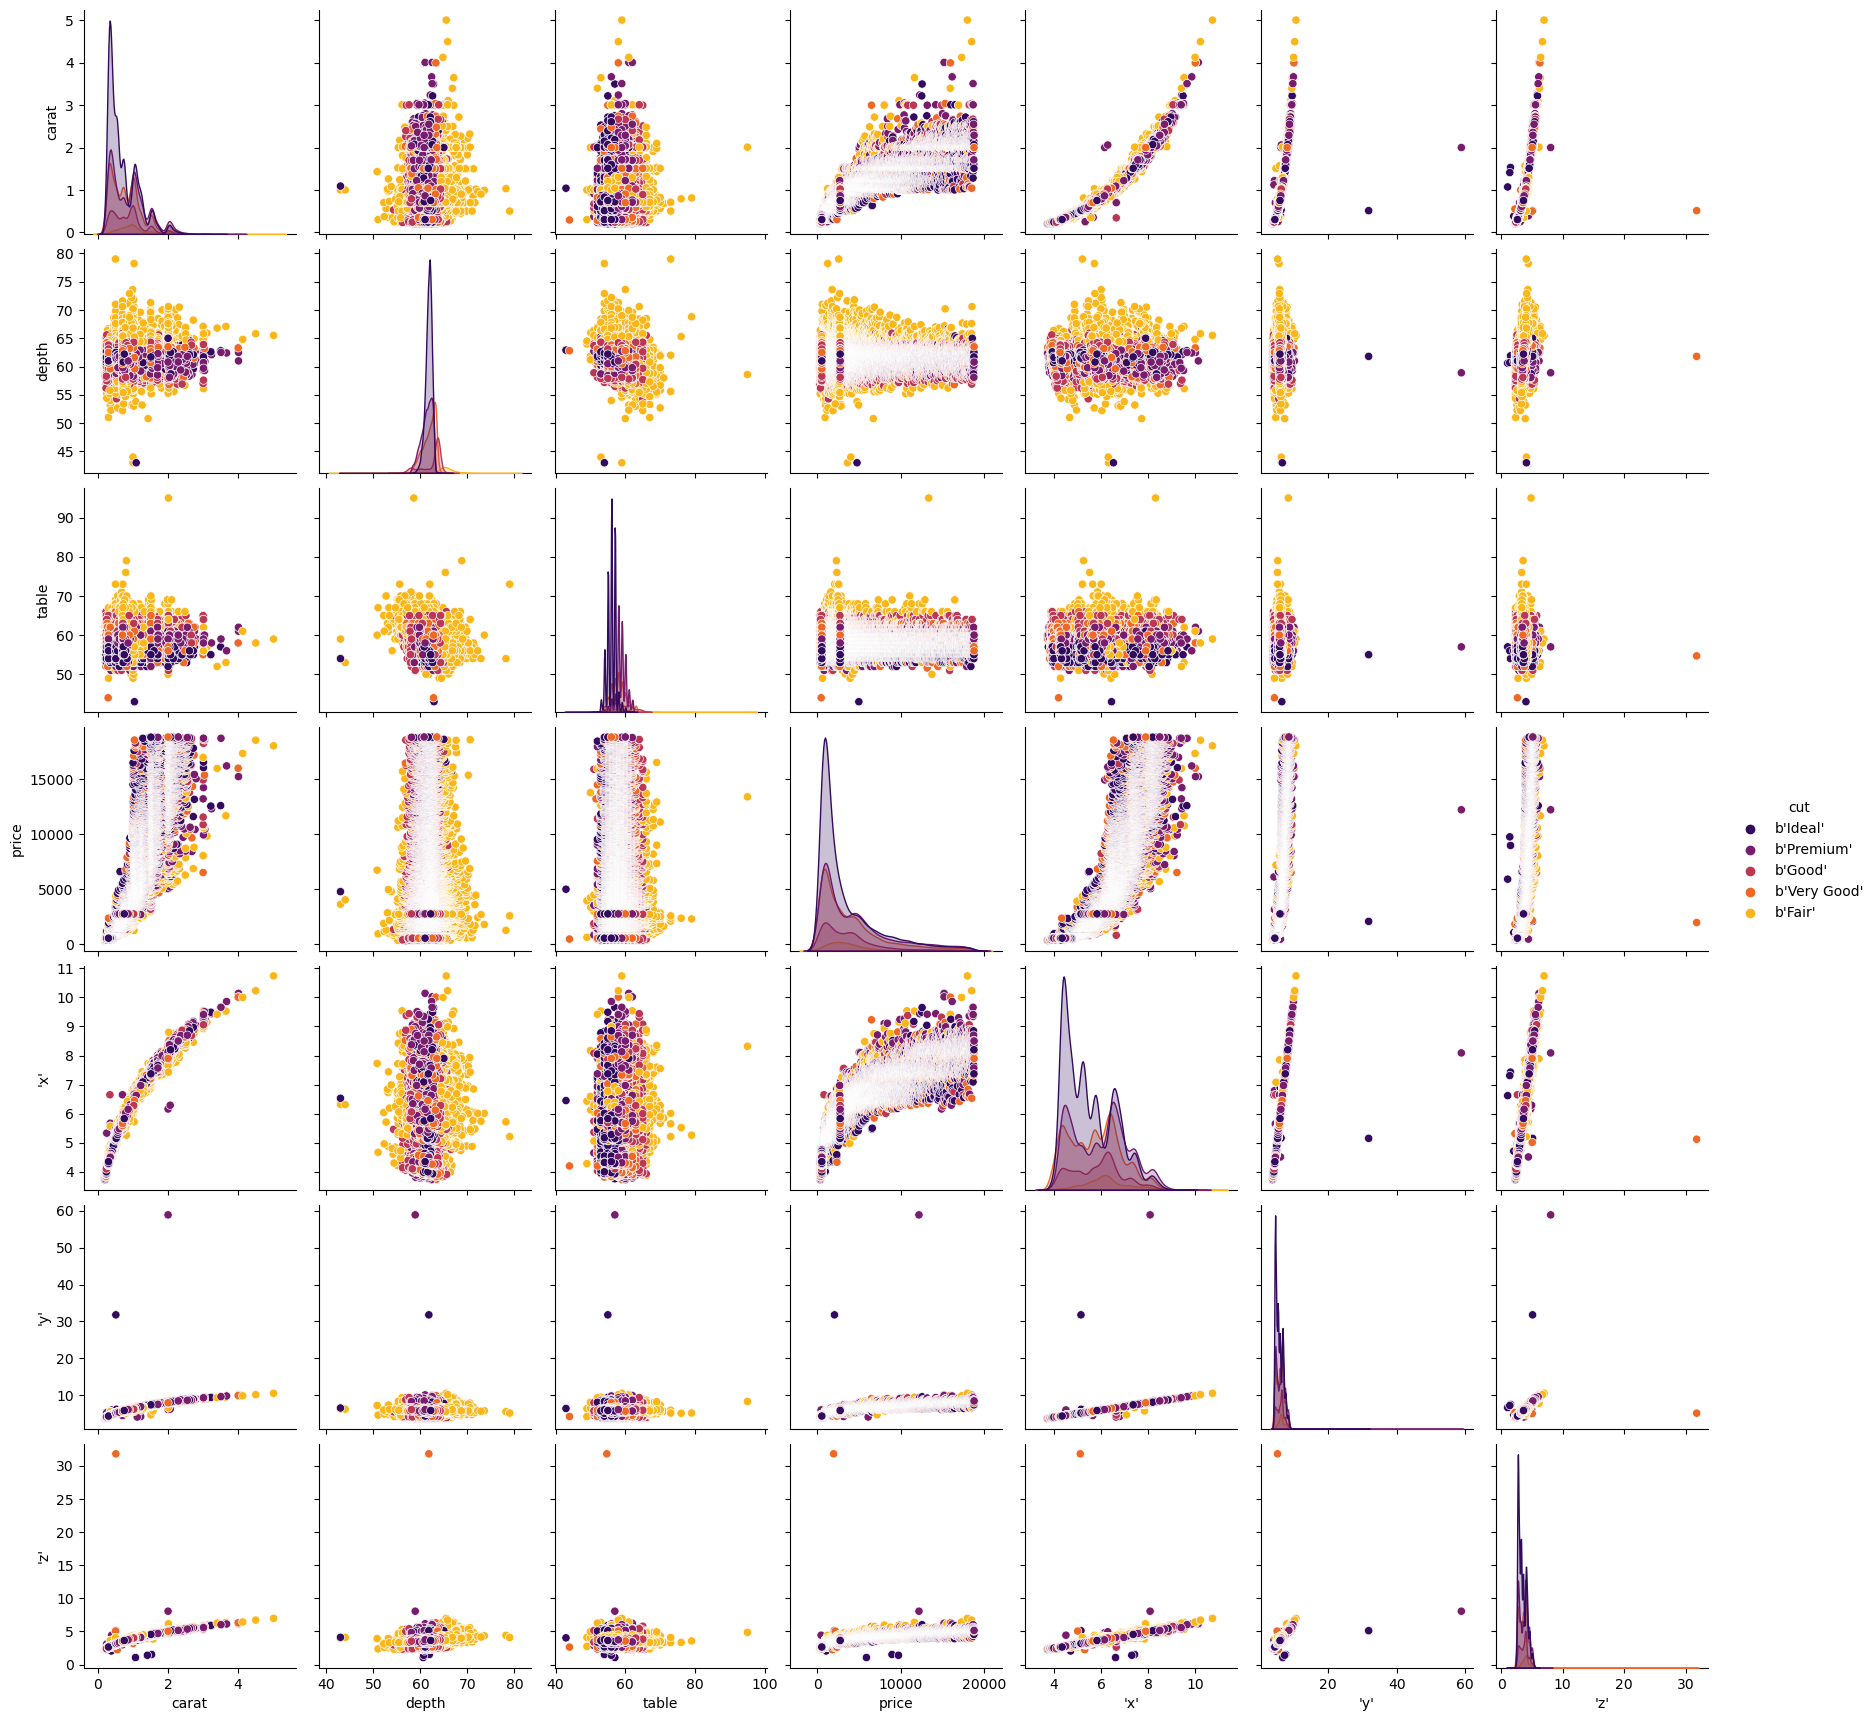

In [27]:
ax = sns.pairplot(df, hue="cut", palette="inferno")

Text(0.5, 1.0, "Regression Line on Price vs 'x'")

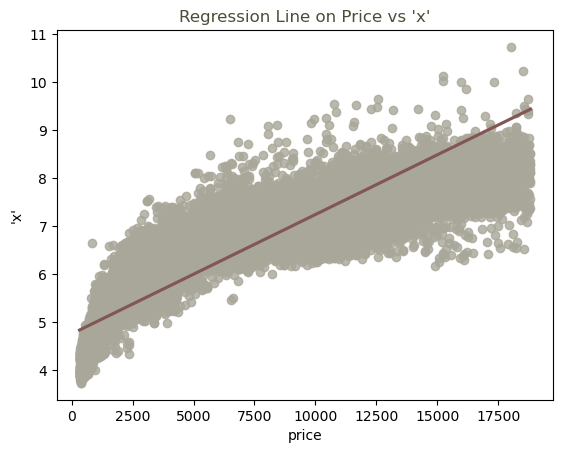

In [28]:
ax=sns.regplot(x="price", y="'x'", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'x'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

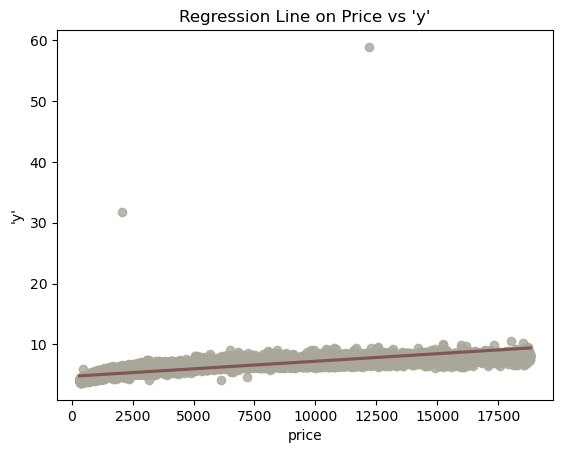

In [29]:
ax = sns.regplot(x="price", y="'y'", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

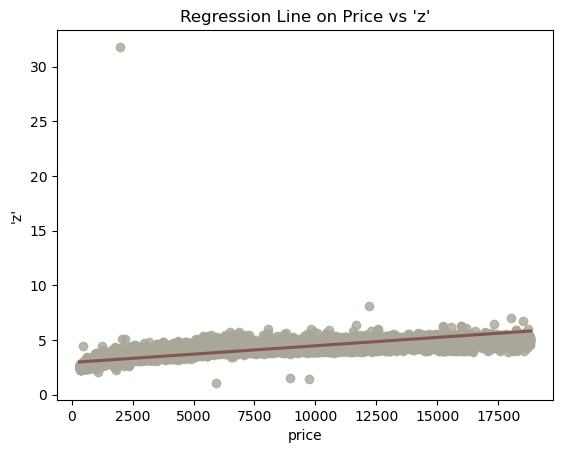

In [30]:
ax= sns.regplot(x="price", y="'z'", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'z'")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

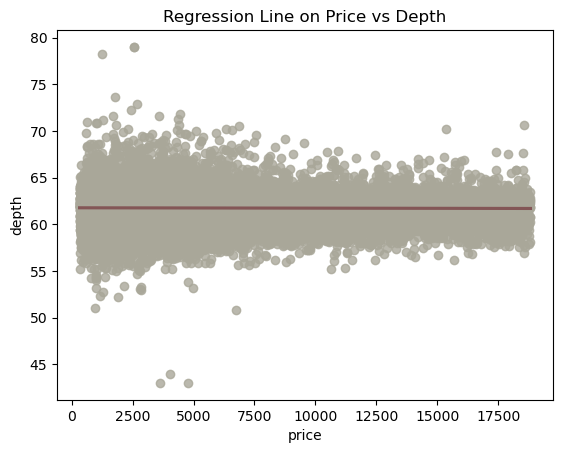

In [31]:
ax= sns.regplot(x="price", y="depth", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Depth")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

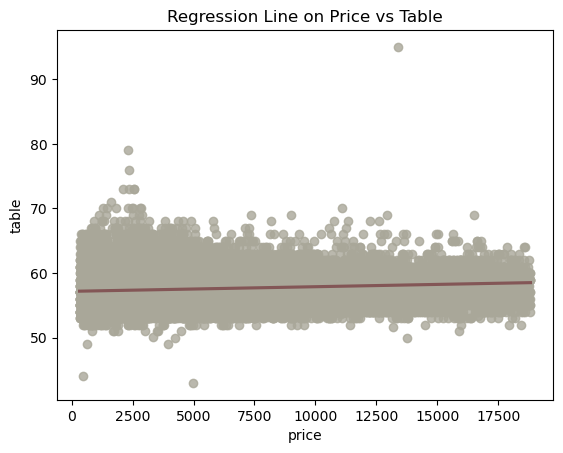

In [32]:
ax=sns.regplot(x="price", y="table", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Table")

Text(0.5, 1.0, 'Regression Line on Price vs Carat')

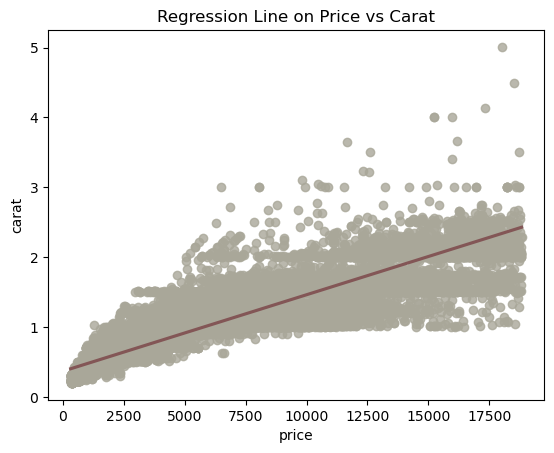

In [33]:
ax=sns.regplot(x="price", y="carat", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Carat")

## Price set below or equal $500
### Demo purpose

In [34]:
df_shrink = df[(df["price"] <= 500)]

Text(0.5, 1.0, "Regression Line on Price vs 'x'")

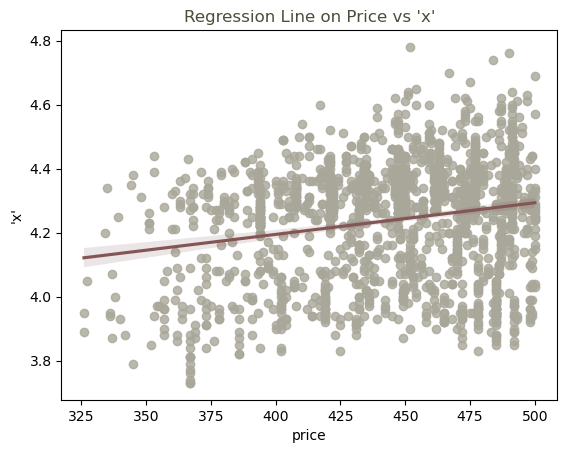

In [35]:
ax=sns.regplot(x="price", y="'x'", data=df_shrink, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'x'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

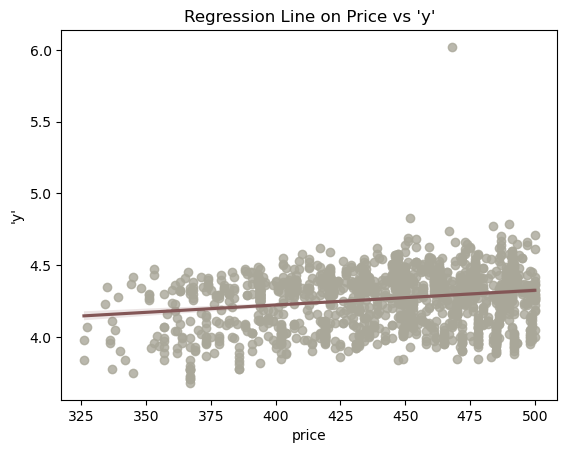

In [36]:
ax = sns.regplot(x="price", y="'y'", data=df_shrink, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

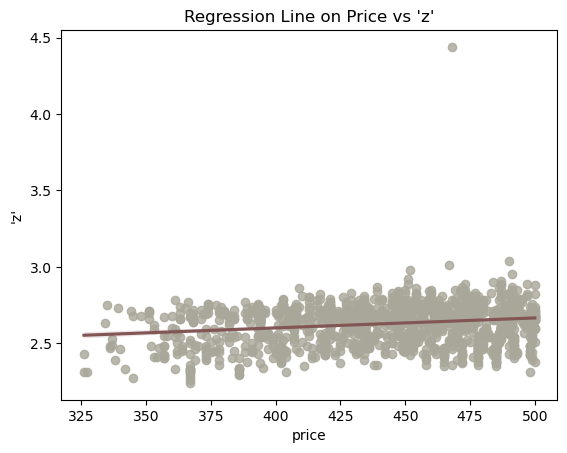

In [37]:
ax= sns.regplot(x="price", y="'z'", data=df_shrink, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'z'")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

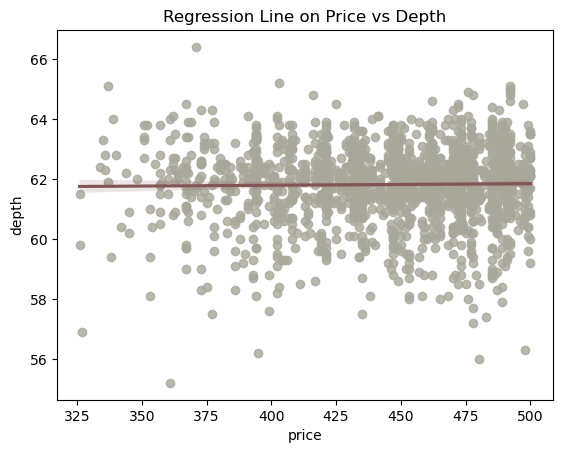

In [38]:
ax= sns.regplot(x="price", y="depth", data=df_shrink, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Depth")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

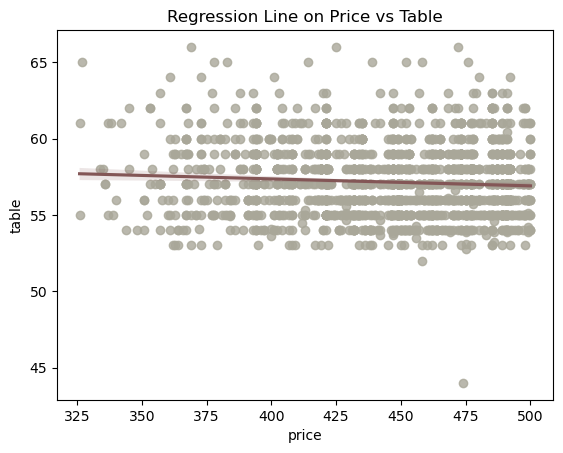

In [39]:
ax=sns.regplot(x="price", y="table", data=df_shrink, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Table")

Text(0.5, 1.0, 'Regression Line on Price vs Carat')

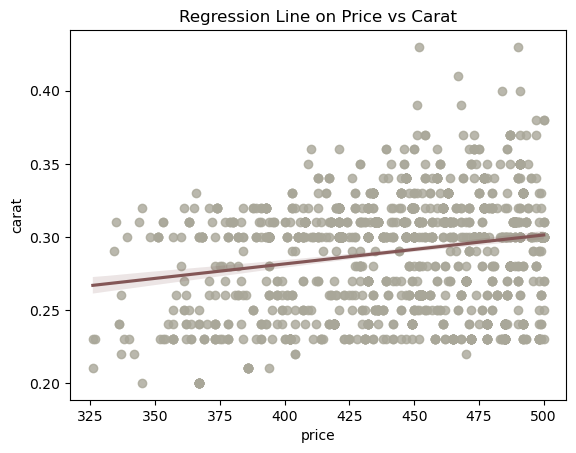

In [40]:
ax=sns.regplot(x="price", y="carat", data=df_shrink, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Carat")

### Remove Outliers

In [41]:
#dropping outlier
df = df[(df["'y'"]<20)]
df = df[(df["'z'"]<10)&(df["'z'"]>2)]
df = df[(df["depth"]<72)&(df["depth"]>52)]
df = df[(df["table"]<78)&(df["table"]>45)]
df = df[(df["carat"]<3)]
df.shape

(53859, 10)

### Encoding character or string into numerical value

In [42]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder object to the category data
# Transform the category data using the transform() method of the label encoder object
label_encoder.fit(df['cut'])
df['cut'] = label_encoder.transform(df['cut'])

label_encoder.fit(df['color'])
df['color'] = label_encoder.transform(df['color'])

label_encoder.fit(df['clarity'])
df['clarity'] = label_encoder.transform(df['clarity'])

# Print the data
df

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757.0,6.15,6.12,3.74


## Correlation matrix

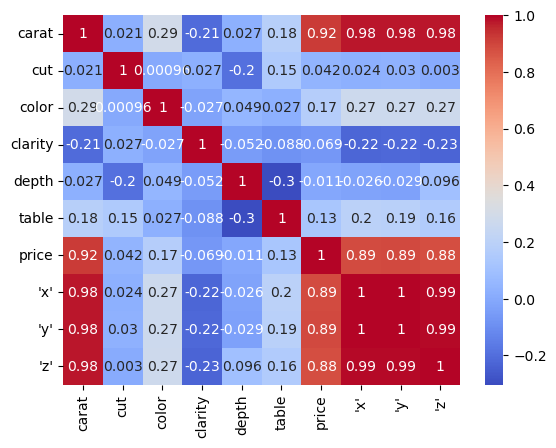

In [43]:
# Plot the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

### Scaler Data

In [44]:
from sklearn.preprocessing import MinMaxScaler
df_scaled = df.copy()

col = df.columns

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(data=df_scaled,columns=[col])

In [45]:
print(df_scaled)

          carat   cut     color   clarity     depth     table     price  \
0      0.011538  0.50  0.166667  0.428571  0.474490  0.222222  0.000000   
1      0.003846  0.75  0.166667  0.285714  0.387755  0.444444  0.000000   
2      0.011538  0.25  0.166667  0.571429  0.239796  0.592593  0.000054   
3      0.034615  0.75  0.833333  0.714286  0.520408  0.333333  0.000433   
4      0.042308  0.25  1.000000  0.428571  0.566327  0.333333  0.000487   
...         ...   ...       ...       ...       ...       ...       ...   
53854  0.200000  0.50  0.000000  0.285714  0.438776  0.296296  0.131427   
53855  0.200000  0.25  0.000000  0.285714  0.556122  0.222222  0.131427   
53856  0.192308  1.00  0.000000  0.285714  0.540816  0.407407  0.131427   
53857  0.253846  0.75  0.666667  0.428571  0.448980  0.333333  0.131427   
53858  0.211538  0.50  0.000000  0.428571  0.510204  0.222222  0.131427   

            'x'       'y'       'z'  
0      0.040441  0.055046  0.090244  
1      0.029412  0.0293

In [46]:
yS = df['price']

scaler = MinMaxScaler()
yS = pd.DataFrame(data=yS,columns=['price'])
yS = scaler.fit_transform(yS)
yS = pd.DataFrame(data=yS,columns=['price'])

In [47]:
yS

,price
0,0.000000
1,0.000000
2,0.000054
3,0.000433
4,0.000487
...,...
53854,0.131427
53855,0.131427
53856,0.131427
53857,0.131427


### Split data into training data and test data

In [48]:
X = df_scaled.drop('price', axis=1, level=0)

y = df_scaled['price']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [49]:
Xa = df_scaled.drop(['price','cut','color','clarity','depth','table'], axis=1)

ya = df_scaled['price']


from sklearn.model_selection import train_test_split
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(Xa, ya, test_size=0.3, random_state=1)


# Support Vector Machine (SVM) (Tai Qi Zheng)

### Support Vector Machine (SVM) With all variable

In [50]:
LL_svr = SVR().fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

predSVM = LL_svr.predict(X_test)

print('The R^2 is: %f'% r2_score(y_test, predSVM))
print("The Adjusted R^2 is:",1 - (1-r2_score(y_test, predSVM))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('The MAE is: %f'% mean_absolute_error(y_test, predSVM))
print('The MSE is: %f'% mean_squared_error(y_test, predSVM))
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_test, predSVM)))
print('The EVS is: %.2f'% explained_variance_score(y_test, predSVM))

The R^2 is: 0.927310
The Adjusted R^2 is: 0.9272696361944075
The MAE is: 0.043134
The MSE is: 0.003252
The RMSE is: 0.06
The EVS is: 0.93


In [51]:
print(predSVM) 
print(y_test)

[0.03850563 0.15954069 0.09906992 ... 0.47532011 0.22046229 0.124398  ]
          price
85     0.012326
47338  0.082392
42573  0.054387
32163  0.025031
40040  0.042602
...         ...
29498  0.020490
11697  0.014597
19191  0.412337
4195   0.175001
53079  0.124290

[16158 rows x 1 columns]


### Support Vector Machine (SVM) With all variable that correlation is more than 0.5

In [52]:
LL_svr = SVR().fit(X_train_a, y_train_a)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

predSVM_a = LL_svr.predict(X_test_a)

print('The R^2 is: %f'% r2_score(y_test_a, predSVM_a))
print("The Adjusted R^2 is:",1 - (1-r2_score(y_test_a, predSVM_a))*(len(y_test_a)-1)/(len(y_test_a)-X_test_a.shape[1]-1))
print('The MAE is: %f'% mean_absolute_error(y_test_a, predSVM_a))
print('The MSE is: %f'% mean_squared_error(y_test_a, predSVM_a))
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_test_a, predSVM_a)))
print('The EVS is: %.2f'% explained_variance_score(y_test_a, predSVM_a))

The R^2 is: 0.854041
The Adjusted R^2 is: 0.854004930090795
The MAE is: 0.057637
The MSE is: 0.006531
The RMSE is: 0.08
The EVS is: 0.86


# Random Forest Regression

In [53]:
# Create a random forest regressor model
rfr = RandomForestRegressor()

# Train the model on the training data
rfr.fit(X_train, y_train)

# Make predictions on the test data
rfr_predictions = rfr.predict(X_test)

print('The R^2 is: %f'% r2_score(y_test, rfr_predictions))
print("The Adjusted R^2 is:",1 - (1-r2_score(y_test, rfr_predictions))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('The MAE is: %f'% mean_absolute_error(y_test, rfr_predictions))
print('The MSE is: %f'% mean_squared_error(y_test, rfr_predictions))
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_test, rfr_predictions)))
print('The EVS is: %.2f'% explained_variance_score(y_test, rfr_predictions))

The R^2 is: 0.979643
The Adjusted R^2 is: 0.979631556928873
The MAE is: 0.014724
The MSE is: 0.000911
The RMSE is: 0.03
The EVS is: 0.98


In [54]:
print(rfr_predictions) 
print(y_test)

[0.01113964 0.08434827 0.05211278 ... 0.41933449 0.19941828 0.14422663]
          price
85     0.012326
47338  0.082392
42573  0.054387
32163  0.025031
40040  0.042602
...         ...
29498  0.020490
11697  0.014597
19191  0.412337
4195   0.175001
53079  0.124290

[16158 rows x 1 columns]


# Decision Tree Regression

In [55]:
# Create a decision tree regressor model
dtf = DecisionTreeRegressor()

# Train the model on the training data
dtf.fit(X_train, y_train)

# Make predictions on the test data
dtf_predictions = dtf.predict(X_test)

print('The R^2 is: %f'% r2_score(y_test, dtf_predictions))
print("The Adjusted R^2 is:",1 - (1-r2_score(y_test, dtf_predictions))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('The MAE is: %f'% mean_absolute_error(y_test, dtf_predictions))
print('The MSE is: %f'% mean_squared_error(y_test, dtf_predictions))
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_test, dtf_predictions)))
print('The EVS is: %.2f'% explained_variance_score(y_test, dtf_predictions))

The R^2 is: 0.961357
The Adjusted R^2 is: 0.9613358137188969
The MAE is: 0.020166
The MSE is: 0.001729
The RMSE is: 0.04
The EVS is: 0.96


In [56]:
print(dtf_predictions) 
print(y_test)

[0.01913824 0.08082392 0.04935936 ... 0.40466022 0.21171001 0.14942964]
          price
85     0.012326
47338  0.082392
42573  0.054387
32163  0.025031
40040  0.042602
...         ...
29498  0.020490
11697  0.014597
19191  0.412337
4195   0.175001
53079  0.124290

[16158 rows x 1 columns]


In [57]:
print()

# R^2 scores for the three models

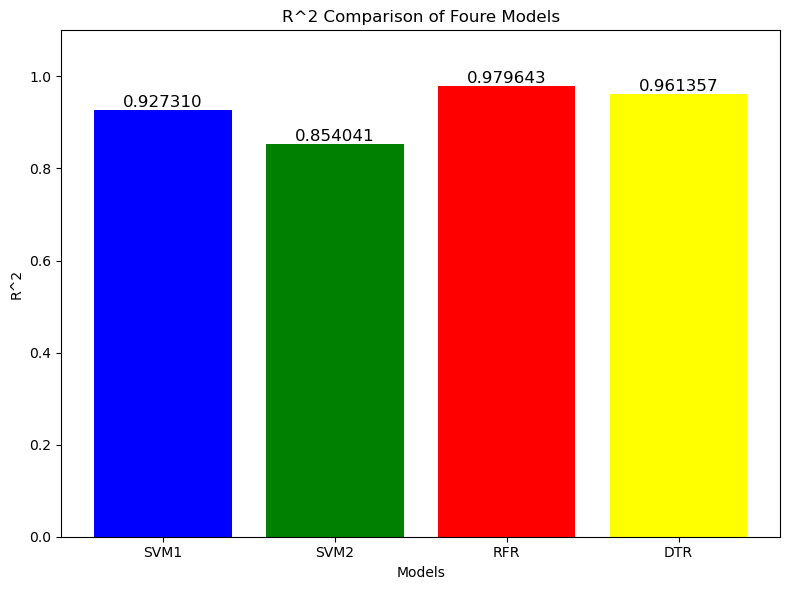

In [58]:
#Accuracy scores for the three models
model_names = ['SVM1', 'SVM2', 'RFR', 'DTR']
R2SVM = r2_score(y_test, predSVM)
R2SVM2 = r2_score(y_test_a, predSVM_a) 
R2RFR = r2_score(y_test, rfr_predictions) 
R2DTR = r2_score(y_test, dtf_predictions) 
R2 = [R2SVM, R2SVM2, R2RFR, R2DTR]

#Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, R2, color=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Models')
plt.ylabel('R^2')
plt.title('R^2 Comparison of Foure Models')
plt.ylim(0, 1.1)  # Set the y-axis limit between 0 and 0.008 (accuracy range)

#Display the accuracy values on top of each bar
for i, score in enumerate(R2):
    plt.text(i, score + 0.0001, f'{score:f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Adjusted R^2 scores for the three models

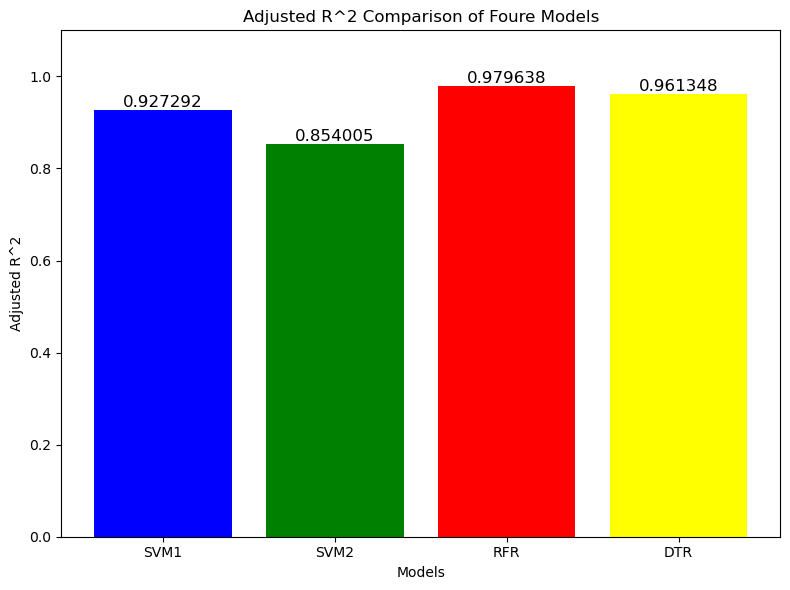

In [59]:
#Accuracy scores for the three models
model_names = ['SVM1', 'SVM2', 'RFR', 'DTR']
ARSVM = 1 - (1-r2_score(y_test, predSVM))*(len(y_test_a)-1)/(len(y_test_a)-X_test_a.shape[1]-1)
ARSVM2 = 1 - (1-r2_score(y_test_a, predSVM_a))*(len(y_test_a)-1)/(len(y_test_a)-X_test_a.shape[1]-1)
ARRFR = 1 - (1-r2_score(y_test, rfr_predictions))*(len(y_test_a)-1)/(len(y_test_a)-X_test_a.shape[1]-1)
ARDTR = 1 - (1-r2_score(y_test, dtf_predictions))*(len(y_test_a)-1)/(len(y_test_a)-X_test_a.shape[1]-1)
AR = [ARSVM, ARSVM2, ARRFR, ARDTR]

#Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, AR, color=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Adjusted R^2')
plt.title('Adjusted R^2 Comparison of Foure Models')
plt.ylim(0, 1.1)  # Set the y-axis limit between 0 and 0.008 (accuracy range)

#Display the accuracy values on top of each bar
for i, score in enumerate(AR):
    plt.text(i, score + 0.0001, f'{score:f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# MAE scores for the three models

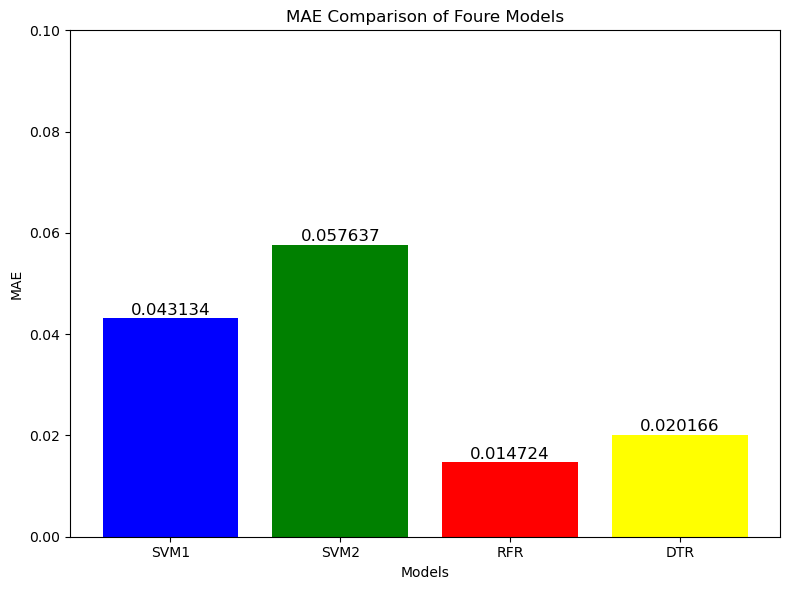

In [60]:
#Accuracy scores for the three models
model_names = ['SVM1', 'SVM2', 'RFR', 'DTR']
MAESVM = mean_absolute_error(y_test_a, predSVM)
MAESVM2 = mean_absolute_error(y_test_a, predSVM_a)
MAERFR = mean_absolute_error(y_test_a, rfr_predictions)
MAEDTR = mean_absolute_error(y_test_a, dtf_predictions)
MAE = [MAESVM, MAESVM2, MAERFR, MAEDTR]

#Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, MAE, color=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE Comparison of Foure Models')
plt.ylim(0, 0.1)  # Set the y-axis limit between 0 and 0.008 (accuracy range)

#Display the accuracy values on top of each bar
for i, score in enumerate(MAE):
    plt.text(i, score + 0.0001, f'{score:f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# MSE scores for the three models

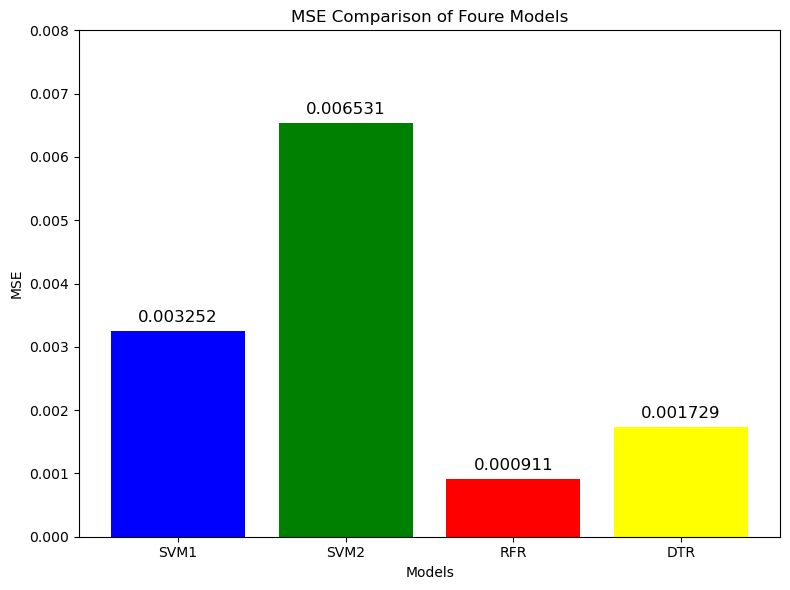

In [61]:
#Accuracy scores for the three models
model_names = ['SVM1', 'SVM2', 'RFR', 'DTR']
MSESVM = mean_squared_error(y_test, predSVM)
MSESVM2 = mean_squared_error(y_test_a, predSVM_a)
MSERFR = mean_squared_error(y_test, rfr_predictions)
MSEDTR = mean_squared_error(y_test, dtf_predictions)
MSE = [MSESVM, MSESVM2, MSERFR, MSEDTR]

#Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, MSE, color=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison of Foure Models')
plt.ylim(0, 0.008)  # Set the y-axis limit between 0 and 0.008 (accuracy range)

#Display the accuracy values on top of each bar
for i, score in enumerate(MSE):
    plt.text(i, score + 0.0001, f'{score:f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# RMSE scores for the three models

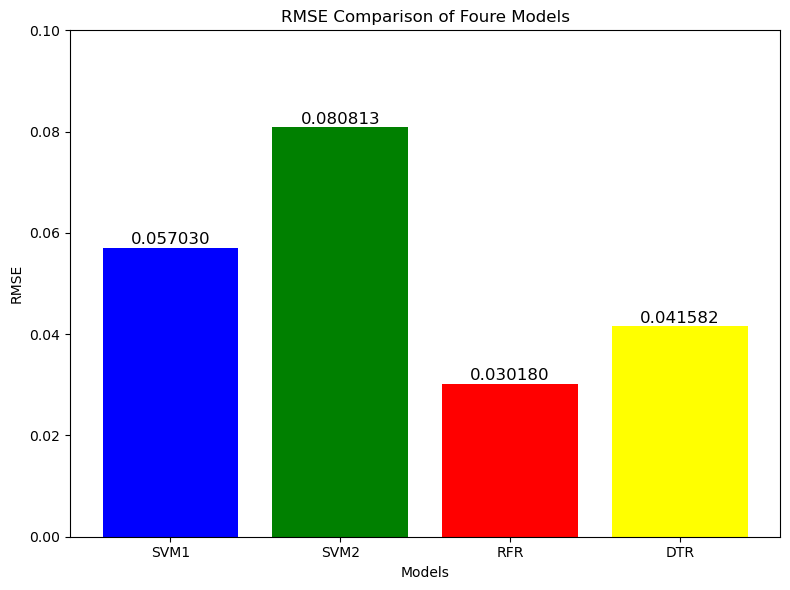

In [62]:
#Accuracy scores for the three models
model_names = ['SVM1', 'SVM2', 'RFR', 'DTR']
RMSESVM = np.sqrt(mean_squared_error(y_test, predSVM))
RMSESVM2 = np.sqrt(mean_squared_error(y_test_a, predSVM_a))
RMSERFR = np.sqrt(mean_squared_error(y_test, rfr_predictions))
RMSEDTR = np.sqrt(mean_squared_error(y_test, dtf_predictions))
RMSE = [RMSESVM, RMSESVM2, RMSERFR, RMSEDTR]

#Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, RMSE, color=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Foure Models')
plt.ylim(0, 0.1)  # Set the y-axis limit between 0 and 0.008 (accuracy range)

#Display the accuracy values on top of each bar
for i, score in enumerate(RMSE):
    plt.text(i, score + 0.0001, f'{score:f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### Explained Variance Score for the three models

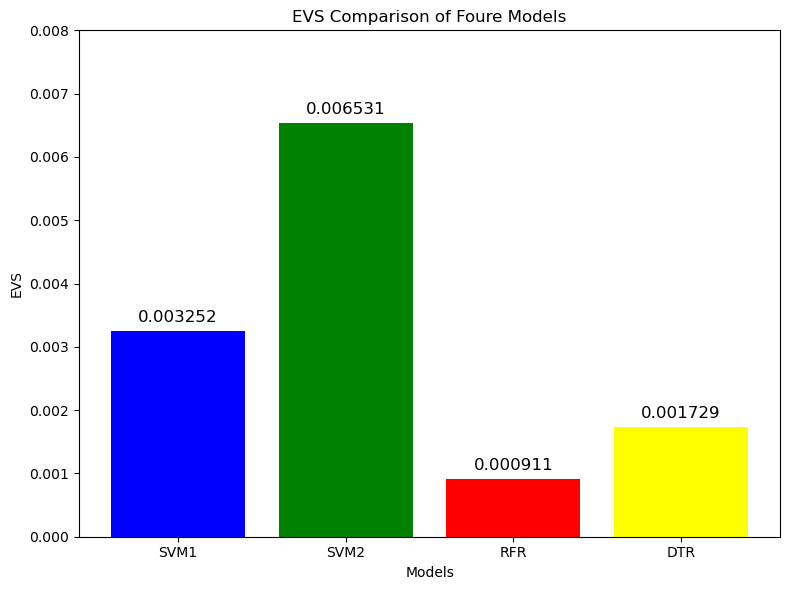

In [63]:
#Accuracy scores for the three models
model_names = ['SVM1', 'SVM2', 'RFR', 'DTR']
EVSSVM = explained_variance_score(y_test, predSVM)
EVSSVM2 = explained_variance_score(y_test_a, predSVM_a)
EVSRFR = explained_variance_score(y_test, rfr_predictions)
EVSDTR = explained_variance_score(y_test, dtf_predictions)
EVS = [MSESVM, MSESVM2, MSERFR, MSEDTR]

#Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, EVS, color=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Models')
plt.ylabel('EVS')
plt.title('EVS Comparison of Foure Models')
plt.ylim(0, 0.008)  # Set the y-axis limit between 0 and 0.008 (accuracy range)

#Display the accuracy values on top of each bar
for i, score in enumerate(EVS):
    plt.text(i, score + 0.0001, f'{score:f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### unscaler data

In [64]:
predSVM = pd.DataFrame(data=predSVM,columns=['price'])
predSVM = scaler.inverse_transform(predSVM)
predSVM

array([[1038.23867818],
       [3277.02408456],
       [2158.49627262],
       ...,
       [9117.99610266],
       [4403.89103051],
       [2626.98979249]])

In [65]:
predSVM_a = pd.DataFrame(data=predSVM_a,columns=['price'])
predSVM_a = scaler.inverse_transform(predSVM_a)
predSVM_a

array([[ -413.33058694],
       [ 2823.27754852],
       [ 2594.71778857],
       ...,
       [11013.2445187 ],
       [ 5233.88489171],
       [ 2665.35199446]])

In [66]:
rfr_predictions = pd.DataFrame(data=rfr_predictions,columns=['price'])
rfr_predictions = scaler.inverse_transform(rfr_predictions)
rfr_predictions

array([[ 532.05],
       [1886.19],
       [1289.93],
       ...,
       [8082.43],
       [4014.64],
       [2993.76]])

In [67]:
dtf_predictions = pd.DataFrame(data=dtf_predictions,columns=['price'])
dtf_predictions = scaler.inverse_transform(dtf_predictions)
dtf_predictions

array([[ 680.],
       [1821.],
       [1239.],
       ...,
       [7811.],
       [4242.],
       [3090.]])

In [68]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[ 554.],
       [1850.],
       [1332.],
       ...,
       [7953.],
       [3563.],
       [2625.]])

In [69]:
y_test_a = scaler.inverse_transform(y_test_a)
y_test_a

array([[ 554.],
       [1850.],
       [1332.],
       ...,
       [7953.],
       [3563.],
       [2625.]])

## Support Vector Machine (SVM) (Tai Qi Zheng)
### Support Vector Machine (SVM) With all variable

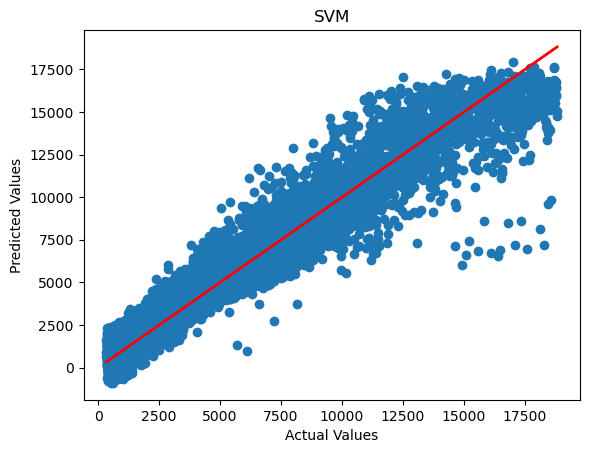

In [70]:
plt.scatter(y_test, predSVM)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM')
plt.show()

In [71]:
LoanData=pd.DataFrame(data=df)
LoanData.head()
TestingDataResults=pd.DataFrame(data=X_test)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=predSVM
TestingDataResults

,carat,cut,color,clarity,depth,table,'x','y','z',TargetColumn,Prediction
85,0.015385,0.75,0.500000,0.857143,0.515306,0.370370,0.040441,0.044037,0.095122,554.0,1038.238678
47338,0.161538,0.25,0.500000,0.714286,0.448980,0.481481,0.308824,0.333945,0.309756,1850.0,3277.024085
42573,0.115385,0.00,0.666667,0.714286,0.209184,0.592593,0.277574,0.280734,0.214634,1332.0,2158.496273
32163,0.042308,0.50,0.500000,0.857143,0.505102,0.222222,0.110294,0.124771,0.156098,789.0,654.471480
40040,0.046154,0.50,0.000000,0.571429,0.443878,0.296296,0.137868,0.141284,0.160976,1114.0,-10.724709
...,...,...,...,...,...,...,...,...,...,...,...
29498,0.080769,0.25,0.333333,0.285714,0.566327,0.333333,0.180147,0.194495,0.226829,705.0,973.947273
11697,0.053846,0.50,0.500000,0.714286,0.474490,0.296296,0.136029,0.152294,0.170732,596.0,497.070099
19191,0.534615,0.75,1.000000,0.714286,0.530612,0.370370,0.683824,0.688073,0.634146,7953.0,9117.996103
4195,0.311538,1.00,0.833333,0.285714,0.556122,0.333333,0.487132,0.486239,0.475610,3563.0,4403.891031


### Support Vector Machine (SVM) With all variable that correlation is more than 0.5

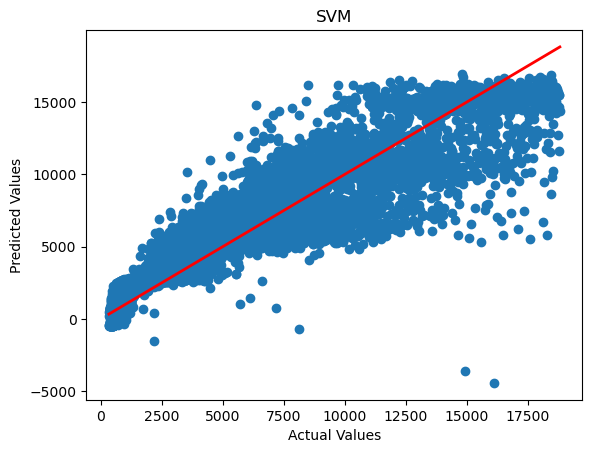

In [72]:
plt.scatter(y_test_a, predSVM_a)
plt.plot([min(y_test_a), max(y_test_a)], [min(y_test_a), max(y_test_a)], color='r', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM')
plt.show()

In [73]:
LoanData=pd.DataFrame(data=df)
LoanData.head()
TestingDataResults=pd.DataFrame(data=X_test_a)
TestingDataResults['TargetColumn']=y_test_a
TestingDataResults['Prediction']=predSVM_a
TestingDataResults

,carat,'x','y','z',TargetColumn,Prediction
85,0.015385,0.040441,0.044037,0.095122,554.0,-413.330587
47338,0.161538,0.308824,0.333945,0.309756,1850.0,2823.277549
42573,0.115385,0.277574,0.280734,0.214634,1332.0,2594.717789
32163,0.042308,0.110294,0.124771,0.156098,789.0,649.409633
40040,0.046154,0.137868,0.141284,0.160976,1114.0,1015.610118
...,...,...,...,...,...,...
29498,0.080769,0.180147,0.194495,0.226829,705.0,2113.065812
11697,0.053846,0.136029,0.152294,0.170732,596.0,1169.684400
19191,0.534615,0.683824,0.688073,0.634146,7953.0,11013.244519
4195,0.311538,0.487132,0.486239,0.475610,3563.0,5233.884892


# Random Forest Regression

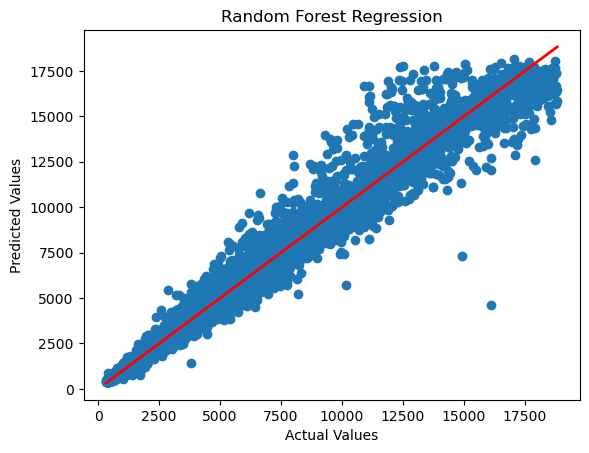

In [74]:
plt.scatter(y_test, rfr_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.show()

In [75]:
LoanData=pd.DataFrame(data=df)
LoanData.head()
TestingDataResults=pd.DataFrame(data=X_test)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=rfr_predictions
TestingDataResults

,carat,cut,color,clarity,depth,table,'x','y','z',TargetColumn,Prediction
85,0.015385,0.75,0.500000,0.857143,0.515306,0.370370,0.040441,0.044037,0.095122,554.0,532.05
47338,0.161538,0.25,0.500000,0.714286,0.448980,0.481481,0.308824,0.333945,0.309756,1850.0,1886.19
42573,0.115385,0.00,0.666667,0.714286,0.209184,0.592593,0.277574,0.280734,0.214634,1332.0,1289.93
32163,0.042308,0.50,0.500000,0.857143,0.505102,0.222222,0.110294,0.124771,0.156098,789.0,777.04
40040,0.046154,0.50,0.000000,0.571429,0.443878,0.296296,0.137868,0.141284,0.160976,1114.0,978.41
...,...,...,...,...,...,...,...,...,...,...,...
29498,0.080769,0.25,0.333333,0.285714,0.566327,0.333333,0.180147,0.194495,0.226829,705.0,720.87
11697,0.053846,0.50,0.500000,0.714286,0.474490,0.296296,0.136029,0.152294,0.170732,596.0,595.71
19191,0.534615,0.75,1.000000,0.714286,0.530612,0.370370,0.683824,0.688073,0.634146,7953.0,8082.43
4195,0.311538,1.00,0.833333,0.285714,0.556122,0.333333,0.487132,0.486239,0.475610,3563.0,4014.64


# Decision Tree Regression

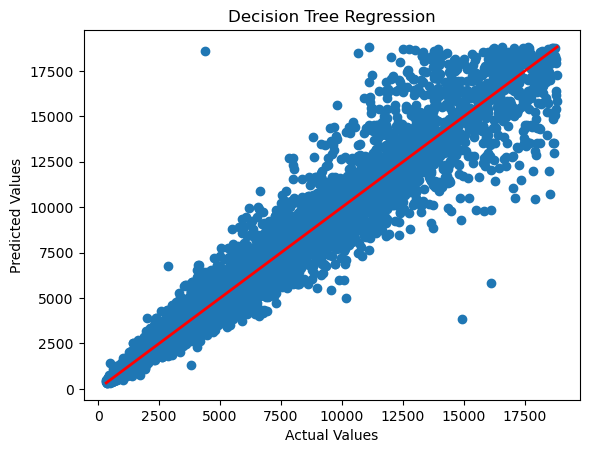

In [76]:
plt.scatter(y_test, dtf_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression')
plt.show()

In [77]:
LoanData=pd.DataFrame(data=df)
LoanData.head()
TestingDataResults=pd.DataFrame(data=X_test)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=dtf_predictions
TestingDataResults

,carat,cut,color,clarity,depth,table,'x','y','z',TargetColumn,Prediction
85,0.015385,0.75,0.500000,0.857143,0.515306,0.370370,0.040441,0.044037,0.095122,554.0,680.0
47338,0.161538,0.25,0.500000,0.714286,0.448980,0.481481,0.308824,0.333945,0.309756,1850.0,1821.0
42573,0.115385,0.00,0.666667,0.714286,0.209184,0.592593,0.277574,0.280734,0.214634,1332.0,1239.0
32163,0.042308,0.50,0.500000,0.857143,0.505102,0.222222,0.110294,0.124771,0.156098,789.0,789.0
40040,0.046154,0.50,0.000000,0.571429,0.443878,0.296296,0.137868,0.141284,0.160976,1114.0,972.0
...,...,...,...,...,...,...,...,...,...,...,...
29498,0.080769,0.25,0.333333,0.285714,0.566327,0.333333,0.180147,0.194495,0.226829,705.0,683.0
11697,0.053846,0.50,0.500000,0.714286,0.474490,0.296296,0.136029,0.152294,0.170732,596.0,596.0
19191,0.534615,0.75,1.000000,0.714286,0.530612,0.370370,0.683824,0.688073,0.634146,7953.0,7811.0
4195,0.311538,1.00,0.833333,0.285714,0.556122,0.333333,0.487132,0.486239,0.475610,3563.0,4242.0


In [78]:
X_u = df_scaled.drop('price', axis=1)

y_u = df['price']


from sklearn.model_selection import train_test_split
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_u, y_u, test_size=0.3, random_state=1)

LL_svr = SVR().fit(X_train_u, y_train_u)
rfr.fit(X_train_u, y_train_u)
dtf.fit(X_train_u, y_train_u)

predSVM_u = LL_svr.predict(X_train_u)
rfr_predictions_u = rfr.predict(X_train_u)
dtf_predictions_u = dtf.predict(X_train_u)

In [79]:
import pandas as pd

data = {
    'carat': (input('Enter the carat: ')),
    'cut': (input('Enter the cut: ')),
    'color': (input('Enter the color: ')),
    'clarity': (input('Enter the clarity: ')),
    'depth': (input('Enter the depth: ')),
    'table': (input('Enter the table: ')),
    'x': (input('Enter the x: ')),
    'y': (input('Enter the y: ')),
    'z': (input('Enter the z: ')),
    }

index = [1]

test_data = pd.DataFrame(data, index=index)

# test_data_s = scaler.fit_transform(test_data)

LL_svr = SVR().fit(X_train_u, y_train_u)
rfr.fit(X_train_u, y_train_u)
dtf.fit(X_train_u, y_train_u)

X_train_u = scaler.fit_transform(X_train_u)

predSVM_u = LL_svr.predict(X_train_u)
predSVM_a_u = LL_svr.predict(X_train_u)
rfr_predictions_u = rfr.predict(X_train_u)
dtf_predictions_u = dtf.predict(X_train_u)

predSVM_u = LL_svr.predict(test_data)
predSVM_a_u = LL_svr.predict(test_data)
rfr_predictions_u = rfr.predict(test_data)
dtf_predictions_u = dtf.predict(test_data)

TestingDataResults=pd.DataFrame(data=test_data)
TestingDataResults['Prediction for SVM']=predSVM_u
TestingDataResults['Prediction for Logistic Regression']=rfr_predictions_u
TestingDataResults['Prediction for KNN']=dtf_predictions_u

TestingDataResults.head(1)

Enter the carat: 0.7
Enter the cut: 3
Enter the color: 3
Enter the clarity: 2
Enter the depth: 50
Enter the table: 20
Enter the x: 4
Enter the y: 4
Enter the z: 2


,carat,cut,color,clarity,depth,table,x,y,z,Prediction for SVM,Prediction for Logistic Regression,Prediction for KNN
1,0.7,3,3,2,50,20,4,4,2,3228.53096,15562.71,16427.0
